In [33]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad, tplquad
from scipy.special import roots_legendre

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales*

---

## 1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






Vamos a calcular la integral de f(x) = exp(3x)*sin(x)
Valor exacto: 1.592098
Vamos a observar la convergencia de los métodos numéricos Trapezoidal y Simpson


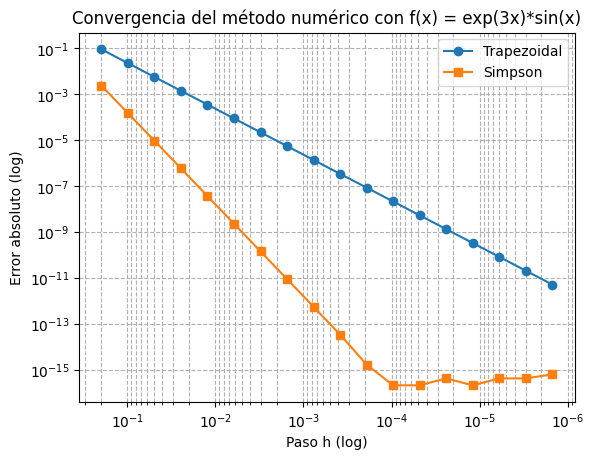

Vamos a calcular la integral de g(x) = 1/(x*ln(x))
Valor exacto: 0.272514
Vamos a observar la convergencia de los métodos numéricos Trapezoidal y Simpson


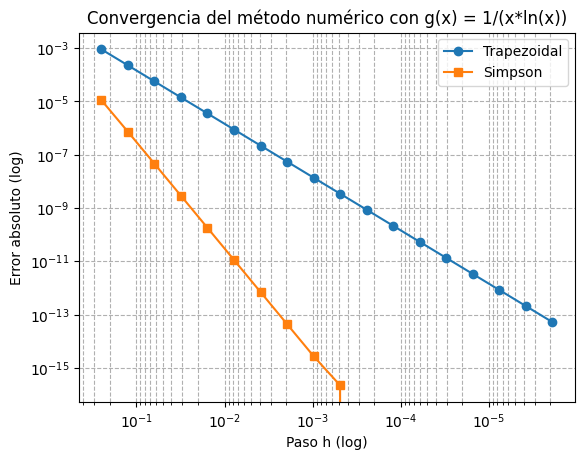

In [19]:
# Definimos las funciones a integrar con sus respectivos intervalos de integración
f = lambda x: np.exp(3*x) * np.sin(x)
a, b = 0, np.pi/4

g = lambda x: 1 / (x*np.log(x))
c,d = np.e, 1+np.e

# Hacemos una función
def convergencia(f, a, b, titulo):
    vexacto = quad(f, a, b)[0] # Valor exacto de la integral
    n = 2**np.arange(2,20) # Número de puntos de integración
    h= (b - a) / n  # Paso de integración
    err_trapezoid = []
    err_simpson = []

    print('Vamos a calcular la integral de', titulo)
    print(f'Valor exacto: {vexacto:.6f}')
    print('Vamos a observar la convergencia de los métodos numéricos Trapezoidal y Simpson')

    for i in n:
        x = np.linspace(a, b, int(i)+1)
        y = f(x)

        trap = trapezoid(y, x)
        simp = simpson(y, x)

        err_trapezoid.append(abs(trap - vexacto))
        err_simpson.append(abs(simp - vexacto))
    
    plt.loglog(h, err_trapezoid, 'o-', label='Trapezoidal')
    plt.loglog(h, err_simpson, 's-', label='Simpson')
    plt.gca().invert_xaxis()
    plt.xlabel('Paso h (log)')
    plt.ylabel('Error absoluto (log)')
    plt.title(f'Convergencia del método numérico con {titulo}')
    plt.legend()
    plt.grid(True, which='both', ls='--')
    plt.show()

convergencia(f, a, b, 'f(x) = exp(3x)*sin(x)')
convergencia(g, c, d, 'g(x) = 1/(x*ln(x))')


Como podemos ver, en la primera y segunda integral el método Trapezoidal se comporta similarmente, disminuyendo su error linealmente conforme se disminuye el paso de integración.
Por otro lado, en la primera integral con el metodo Simpson decrece rapidamente y su error es menor al del metodo Trapezoidal, sin embargo, al final de la curva de error se ve que llega a un limite y apartir de ahi empieza a oscilar un poco debido a errores de redondeo. En la segunda integral con el metodo Simpson decrece rapidamente y su error es menor al del metodo Trapezoidal

Vamos a ver la convergencia de fixedquad


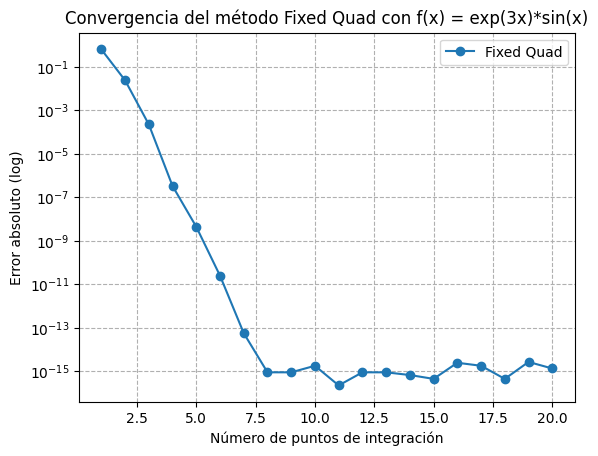

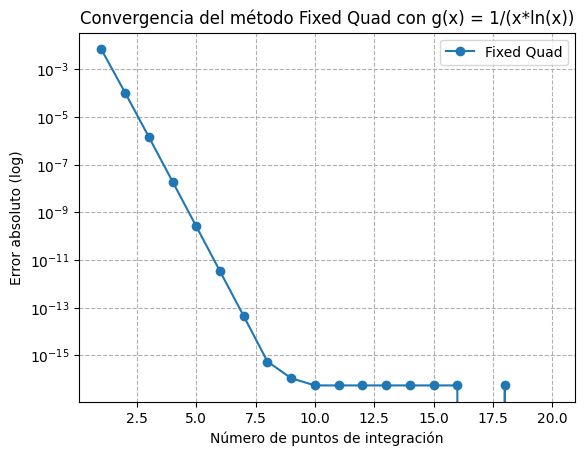

In [26]:
print('Vamos a ver la convergencia de fixedquad')
def fixedquad_convergencia(f, a, b, titulo):
    vexacto = quad(f, a, b)[0] # Valor exacto de la integral
    error = []

    for i in range(1,21):
        aprox = fixed_quad(f, a, b, n=i)[0]
        error.append(abs(aprox - vexacto))
    
    plt.semilogy(range(1,21), error, 'o-', label='Fixed Quad')
    plt.xlabel('Número de puntos de integración')
    plt.ylabel('Error absoluto (log)')
    plt.title(f'Convergencia del método Fixed Quad con {titulo}')
    plt.legend()
    plt.grid(True, which='both', ls='--')
    plt.show()

fixedquad_convergencia(f, a, b, 'f(x) = exp(3x)*sin(x)')
fixedquad_convergencia(g, c, d, 'g(x) = 1/(x*ln(x))')

En la primera funcion podemos observar que al aumentar el numero de puntos el error disminuye, esto ocurre hasta un punto en el que empieza a oscilar, volviendose inestable
En la segunda funcion podemos observar que al aumentar el numero de puntos el error disminuye

## 2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [37]:
def integral_z(x, y):
    f = lambda z: 1/y * np.sin(z/y)
    integral = quad(f, 0, x*y)[0] # Valor de la integral
    return integral

def integral_y(x):
    f = lambda y: integral_z(x, y)
    integral = quad(f, 0, x)[0] # Valor de la integral
    return integral

integral_quad = quad(integral_y, 0, np.pi)[0] # Valor de la integral completa

print(f'Valor de la integral completa con quad: {integral_quad}')

# Integral con tplquad
h = lambda z, y, x: 1/y * np.sin(z/y)
integral_tplquad = tplquad(h, 0, np.pi, lambda x: 0, lambda x: x, lambda x, y: 0, lambda x, y: x*y)[0]

print(f'Valor de la integral completa con tplquad: {integral_tplquad}')

if integral_quad == integral_tplquad:
    print('Los resultados de quad y tplquad son iguales')
else:
    print('Los resultados de quad y tplquad son diferentes')



Valor de la integral completa con quad: 6.934802200544679
Valor de la integral completa con tplquad: 6.934802200544679
Los resultados de quad y tplquad son iguales


## 3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [48]:
def gauss_quad_standard(func, a, b, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Cambio de variable
    variable = ((b - a) / 2) * x + (b + a) / 2

    # Evaluar la suma ponderada
    integral = np.sum([w[i] * func(variable[i]) for i in range(n)]) * ((b - a) / 2)
    
    return integral

gauss = gauss_quad_standard(integral_y, 0, np.pi, 4)
print('La integral del problema 2 utilizando cuadratura gaussiana es:', gauss)

La integral del problema 2 utilizando cuadratura gaussiana es: 6.934926441626484


## 4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [ ]:
# Primera integral
f = lambda x : 1 / ((np.tan(x))**(1/2))
a, b = 0, np.pi/2
tol = 1e-5
vexacto = quad(f, a, b)[0]  # Valor exacto de la integral
for i in np.arange(10,1000000):
    x = np.linspace(tol, b, i+1)
    y = f(x)
    trap = trapezoid(y, x)

    if abs(trap - vexacto) < tol:
        print(f'Con {i+1} puntos, el método Trapezoidal converge a {trap}')
        break

for i in np.arange(10,1000000):
    x = np.linspace(tol, b, i+1)
    y = f(x)
    simp = simpson(y, x)

    if abs(simp - vexacto) < tol:
        print(f'Con {i+1} puntos, el método Simpson converge a {simp}')
        break

# Cambio de variable 

f = lambda x : (2*x) / (np.tan(x**2))**(1/2)

for i in np.arange(10,1000000,10):
    cuadratura = fixed_quad(f, 0, (np.pi/2)**(1/2), n=i)[0]

    if abs(cuadratura - vexacto) < tol:
        print(f'Con {i} puntos, el método Gauss converge a {gauss}')
        break

Con 15611 puntos, el método Trapezoidal converge a 2.2214470401964146
Con 9645 puntos, el método Simpson converge a 2.2214505903162176
Con 40 puntos, el método Gauss converge a 2.2212047838394597


In [63]:
# Segunda integral
g = lambda x : np.cos(x) / x**3

f = lambda x : x*np.cos(1/x)
a, b = 1, 500
tol = 1e-5
vexacto = quad(g, a, b)[0]  # Valor exacto de la integral
for i in np.arange(10,1000000):
    x = np.linspace(tol, 1, i+1)
    y = f(x)
    trap = trapezoid(y, x)

    if abs(trap - vexacto) < tol:
        print(f'Con {i+1} puntos, el método Trapezoidal converge a {trap}')
        break

for i in np.arange(10,1000000):
    x = np.linspace(tol, 1, i+1)
    y = f(x)
    simp = simpson(y, x)

    if abs(simp - vexacto) < tol:
        print(f'Con {i+1} puntos, el método Simpson converge a {simp}')
        break

for i in np.arange(10,1000000,10):
    cuadratura = fixed_quad(f, 0, 1, n=i)[0]

    if abs(cuadratura - vexacto) < tol:
        print(f'Con {i} puntos, el método Gauss converge a {gauss}')
        break

Con 92 puntos, el método Trapezoidal converge a 0.018116607917703743
Con 165 puntos, el método Simpson converge a 0.018116741661550657
Con 90 puntos, el método Gauss converge a 2.2212047838394597
